In [ ]:
#Homework 6: Vectors & Matrices  - Abraham Cepeda Oseguera - BUID: U75425818

M1: A' = [0. 0.], B' = [0. 1.], C' = [1.5 1. ], D' = [1.5 0. ]
M2: A' = [0. 0.], B' = [0.   0.75], C' = [1.   0.75], D' = [1. 0.]
M3: A' = [0 0], B' = [2 1], C' = [3 1], D' = [1 0]
M4: A' = [0. 0.], B' = [0. 1.], C' = [1.   2.25], D' = [1.   1.25]
M5: A' = [0. 0.], B' = [-0.70710678  0.70710678], C' = [1.11022302e-16 1.41421356e+00], D' = [0.70710678 0.70710678]
M6: A' = [0. 0.], B' = [0.5       0.8660254], C' = [1.3660254 0.3660254], D' = [ 0.8660254 -0.5      ]


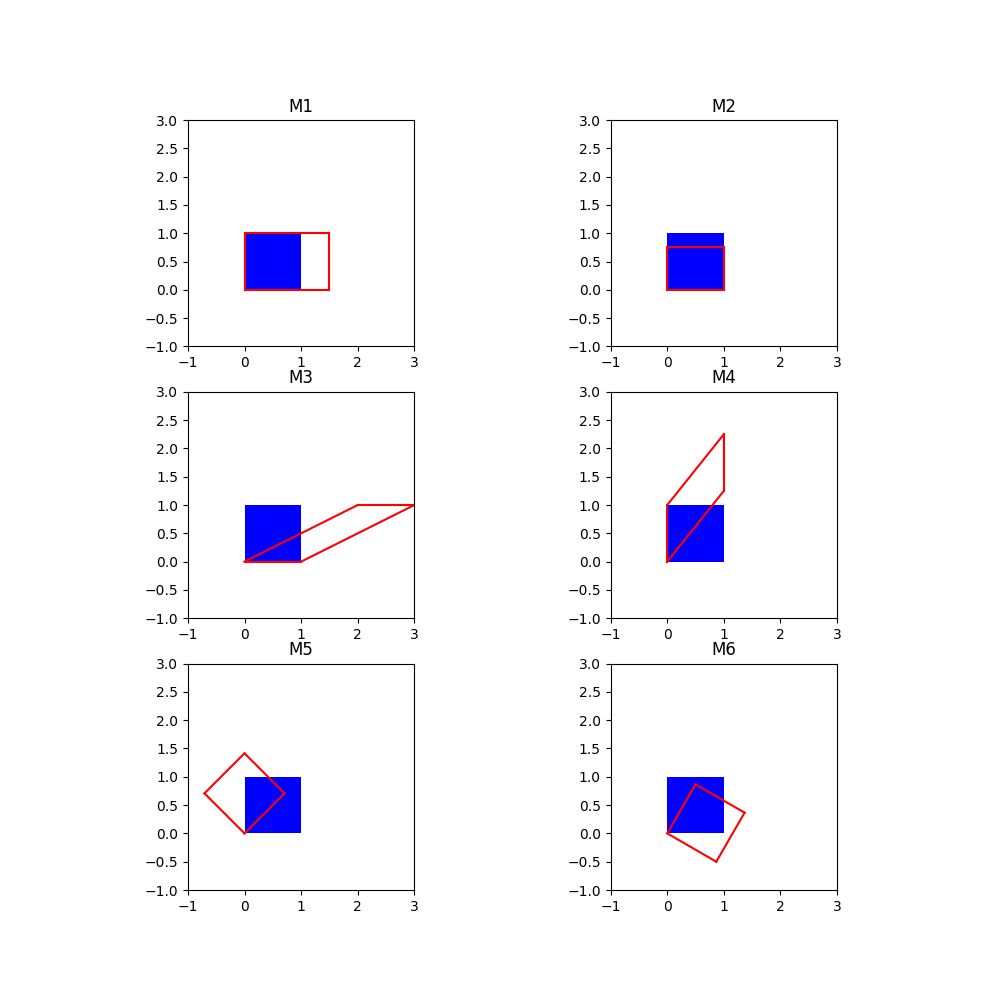

In [91]:
#Problem 1. Apply matrix to original square
import numpy as np
import matplotlib.pyplot as plt

A = np.array([0,0])
B = np.array([0,1])
C = np.array([1,1])
D = np.array([1,0])

#1.1 M1 - expand x by a factor of 1.5
M1 = np.array([[1.5,0],[0,1]])

#1.2 M2 - contract y by a factor of 0.75
M2 = np.array([[1,0],[0,0.75]])

#1.3 M3 - shear along x by a factor of 2
M3 = np.array([[1,2],[0,1]])

#1.4 M4 - shear along y by a factor of 1.25
M4 = np.array([[1,0],[1.25,1]])

#1.5 M5 - counterclockwise rotation by pi/4
theta = np.pi/4
M5 = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

#1.6 M6 - clockwise rotation by pi/6
theta2 = np.pi/6
M6 = np.array([[np.cos(theta2),np.sin(theta2)],[-np.sin(theta2),np.cos(theta2)]])

#Matrices M1-M6
M = [M1,M2,M3,M4,M5,M6]

figure, axis = plt.subplots(3, 2, figsize=(10,10))

#loop matrices and plot
for i in range(len(M)):
    A_M = M[i].dot(A)
    B_M = M[i].dot(B)
    C_M = M[i].dot(C)
    D_M = M[i].dot(D)
    
    rectangle = plt.Rectangle((0,0), 1, 1, fc='blue')
    axis[i//2,i%2].add_patch(rectangle)
    axis[i//2,i%2].plot([A_M[0],B_M[0]],[A_M[1],B_M[1]],'r')
    axis[i//2,i%2].plot([B_M[0],C_M[0]],[B_M[1],C_M[1]],'r')
    axis[i//2,i%2].plot([C_M[0],D_M[0]],[C_M[1],D_M[1]],'r')
    axis[i//2,i%2].plot([D_M[0],A_M[0]],[D_M[1],A_M[1]],'r')
    axis[i//2,i%2].set_title('M'+str(i+1))
    axis[i//2,i%2].set_xlim(-1,3)
    axis[i//2,i%2].set_ylim(-1,3)
    axis[i//2,i%2].set_aspect('equal')
    
    print("M"+str(i+1)+": A' = "+str(A_M)+", B' = "+str(B_M)+", C' = "+str(C_M)+", D' = "+str(D_M))

plt.show()



In [92]:
#Problem 2. Compute inverses of each matrix
from numpy.linalg import inv

for i in range(len(M)):
    print("M" + str(i+1) + " Inverse:")
    print(inv(M[i]))


M1 Inverse:
[[0.66666667 0.        ]
 [0.         1.        ]]
M2 Inverse:
[[1.         0.        ]
 [0.         1.33333333]]
M3 Inverse:
[[ 1. -2.]
 [ 0.  1.]]
M4 Inverse:
[[ 1.    0.  ]
 [-1.25  1.  ]]
M5 Inverse:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
M6 Inverse:
[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


M1: A' = [0. 0.], B' = [7.95495129 0.70710678], C' = [19.09188309  1.41421356], D' = [11.1369318   0.70710678]
M2: A' = [0. 0.], B' = [12.81634295  0.8660254 ], C' = [8.01490011 0.3660254 ], D' = [-4.80144284 -0.5       ]


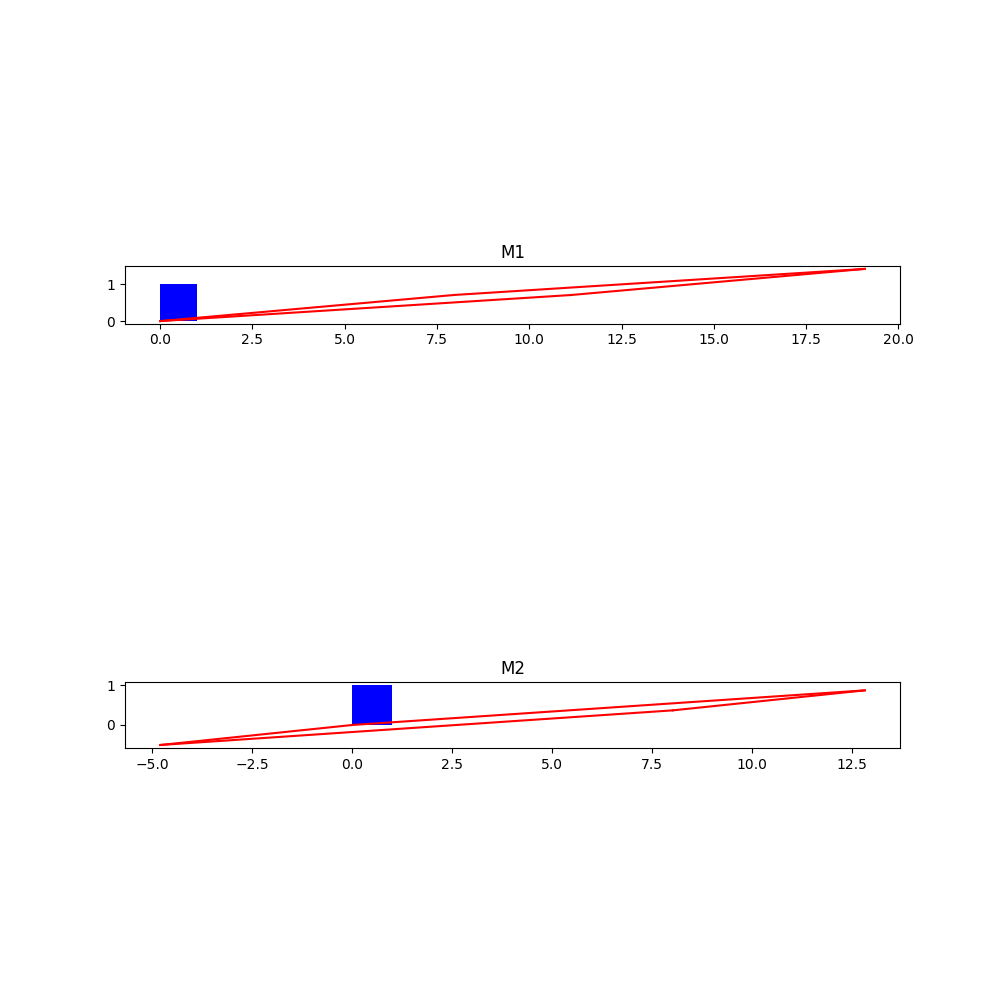

In [95]:
#Problem 3. Compute transformations
from numpy.linalg import inv
from numpy.linalg import matrix_power

M1_2 = matrix_power(M1,2)
M3_3 = matrix_power(M3,3)
M_1 = M1_2.dot(M3_3)
M_2 = M_1.dot(M5)


figure, axis = plt.subplots(2, 1, figsize=(10,10))

rectangle = plt.Rectangle((0,0), 1, 1, fc='blue')
rectangle2 = plt.Rectangle((0,0), 1, 1, fc='blue')
axis[0].add_patch(rectangle)
axis[1].add_patch(rectangle2)

M2_I = inv(M2)
M4_I = inv(M4)
M4_I2 = matrix_power(M4_I,2)
M_3 = M2_I.dot(M4_I2)
M_4 = M_1.dot(M6)


Matrix = [M_2, M_4]

for i in range(len(Matrix)):
    A2 = Matrix[i].dot(A)
    B2 = Matrix[i].dot(B)
    C2 = Matrix[i].dot(C)
    D2 = Matrix[i].dot(D)

    axis[i].plot([A2[0],B2[0]],[A2[1],B2[1]],'r')
    axis[i].plot([B2[0],C2[0]],[B2[1],C2[1]],'r')
    axis[i].plot([C2[0],D2[0]],[C2[1],D2[1]],'r')
    axis[i].plot([D2[0],A2[0]],[D2[1],A2[1]],'r')
    axis[i].set_title('M'+str(i+1))
    
    axis[i].set_aspect('equal')
    
    print("M"+str(i+1)+": A' = "+str(A2)+", B' = "+str(B2)+", C' = "+str(C2)+", D' = "+str(D2))

plt.show()

In [96]:
#Problem 4. Invert Matrices
import numpy as np
from numpy.linalg import inv

A = np.array([[1,2],[3,4]])
B = np.array([[5,9],[2,5]])
C = np.array([[2,1,0],[3,6,1],[5,7,1]])

print("A inverse = ", inv(A))
print("B inverse = ", inv(B))
print("C inverse = ", inv(C))

A inverse =  [[-2.   1. ]
 [ 1.5 -0.5]]
B inverse =  [[ 0.71428571 -1.28571429]
 [-0.28571429  0.71428571]]
C inverse =  [[ 5.00399959e+14  5.00399959e+14 -5.00399959e+14]
 [-1.00079992e+15 -1.00079992e+15  1.00079992e+15]
 [ 4.50359963e+15  4.50359963e+15 -4.50359963e+15]]


In [97]:
#Problem 5. Compute logarithms of Matrices
import numpy as np
from numpy.linalg import matrix_power
from numpy.linalg import inv

A = np.array([[1,2],[3,4]])
B = np.array([[5,9],[2,5]])
A_INV = inv(A)
B_INV = inv(B)
I = np.array([[1,0],[0,1]])

#1. Log(A)
A_I = A - I
A_I_2 = matrix_power(A_I, 2) / 2
A_I_3 = matrix_power(A_I, 3) / 3
Log_A = A_I - A_I_2 + A_I_3

print("Log(A)", Log_A)
print("")


#2. Log(A')
A_I = A_INV - I
A_I_2 = matrix_power(A_I, 2) / 2
A_I_3 = matrix_power(A_I, 3) / 3
Log_A = A_I - A_I_2 + A_I_3

print("Log(A')", Log_A)
print("")


#3. Log(B)
B_I = B - I
B_I_2 = matrix_power(B_I, 2) / 2
B_I_3 = matrix_power(B_I, 3) / 3
Log_B = B_I - B_I_2 + B_I_3

print("Log(B): ", Log_B)
print("")


#4. Log(B')
B_I = B_INV - I
B_I_2 = matrix_power(B_I, 2) / 2
B_I_3 = matrix_power(B_I, 3) / 3
Log_B = B_I - B_I_2 + B_I_3

print("Log(B'): ", Log_B)


Log(A) [[ 3.   9. ]
 [13.5 16.5]]

Log(A') [[-21.    9. ]
 [ 13.5  -7.5]]

Log(B):  [[ 80.33333333 171.        ]
 [ 38.          80.33333333]]

Log(B'):  [[-0.62293489 -1.9154519 ]
 [-0.42565598 -0.62293489]]


In [98]:
#Problem 6. Compute systems of equations with Gaussian Elimination
import numpy as np

A = np.array([[2, 3], [2, -1]]) 
a = np.array([8, 0])
s = np.linalg.solve(A, a)
print("1. x: ", s[0], " , y: ", s[1])

B = np.array([[1, 2], [2, 1]]) 
b = np.array([-2, 2])
s = np.linalg.solve(B, b)
print("2. x: ", s[0], " , y: ", s[1])

C = np.array([[2, 3, 4], [1, -1, 1], [2, -1, 1]]) 
c = np.array([4, 1, 1])
s = np.linalg.solve(C, c)
print("3. x: ", s[0], " , y: ", s[1], " z: ", s[2])

D = np.array([[1, 1, 1], [2, 1, 1], [1, 2, 2]]) 
d = np.array([1, 2, 1])
s = np.linalg.solve(D, d)
print("4. x: ", s[0], " , y: ", s[1], " z: ", s[2])



1. x:  1.0  , y:  2.0
2. x:  2.0  , y:  -2.0
3. x:  0.0  , y:  0.0  z:  1.0
4. x:  nan  , y:  nan  z:  nan


In [4]:
from numpy.linalg import det
from numpy.linalg import matrix_power
import numpy as np

A = np.array([[7,4],[6,5]])
A11 = matrix_power(A,11)
A10 = matrix_power(A,10)
A2 = A11 - A10
print(A11)
print(A10)
print(A2)
print(det(A2))

[[171187002367 114124668244]
 [171187002366 114124668245]]
[[15562454761 10374969840]
 [15562454760 10374969841]]
[[155624547606 103749698404]
 [155624547606 103749698404]]
0.0


In [17]:
from numpy.linalg import det
from numpy.linalg import matrix_power
import numpy as np

A1 = np.array([[9,3],[4,2]])
A2 = np.array([[2,8],[7,1]])
D1 = det(A1)
D2 = det(A2)

print(D1)
print(D2)

B = A1.dot(A2)
print(B)
C1 = np.array([[5,2],[1,2]])
V1 = det(C1)
print(V1)

C2 = C1.dot(B)
print(C2)
V2 = det(C2)
print(V2)

print("1: ", V1*(D1*D2))
print("2: ",V1*(D1))
print("2: ",V1*(D2))

6.000000000000003
-54.00000000000001
[[39 75]
 [22 34]]
7.999999999999998
[[239 443]
 [ 83 143]]
-2591.999999999995
1:  -2592.000000000001
2:  48.00000000000001
2:  -431.99999999999994
